## Data transformation

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [81]:
df = pd.read_csv('customer_supermarket_prepared.csv', sep=',')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(30)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
5,536365,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,22752,SET 7 BABUSHKA NESTING BOXES,2,15.30
6,536365,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,25.50
7,536366,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,22633,HAND WARMER UNION JACK,6,11.10
8,536366,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,22632,HAND WARMER RED POLKA DOT,6,11.10
9,536368,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,22960,JAM MAKING SET WITH JARS,6,25.50


In [18]:
df['BasketDate'] = pd.to_datetime(df['BasketDate'], format="%Y-%m-%d %H:%M:%S").copy()

In [19]:
df1 = df.groupby('CustomerID').aggregate({'Qta':'sum', 'ProdID':'nunique'})
df1.rename(columns={'Qta':'I', 'ProdID':'Iu'}, inplace=True)
df1

,I,Iu
CustomerID,,
12346.0,74215,1
12347.0,2458,103
12348.0,2332,21
12349.0,630,72
12350.0,196,16
...,...,...
18280.0,45,10
18281.0,54,7
18282.0,103,12


In [20]:
df_agg = df.groupby(['CustomerID', 'BasketID']).aggregate({'Qta':'sum'})
df_agg

Qta
CustomerID BasketID       
12346.0    541431    74215
12347.0    537626      319
           542237      315
           549222      483
           556201      196
...                    ...
18283.0    579673      132
           580872      142
18287.0    554065      488
           570715      990
           573167      108

[18405 rows x 1 columns]

In [21]:
df_agg.reset_index(level='CustomerID')

,CustomerID,Qta
BasketID,,
541431,12346.0,74215
537626,12347.0,319
542237,12347.0,315
549222,12347.0,483
556201,12347.0,196
...,...,...
579673,18283.0,132
580872,18283.0,142
554065,18287.0,488


In [22]:
df2 = df_agg.reset_index(level='CustomerID').groupby('CustomerID').aggregate({'Qta':'max'})
df2.rename(columns={'Qta':'Imax'}, inplace=True)
df2

,Imax
CustomerID,
12346.0,74215
12347.0,676
12348.0,1248
12349.0,630
12350.0,196
...,...
18280.0,45
18281.0,54
18282.0,75


In [23]:
df_customer = pd.merge(df1, df2, on='CustomerID')
df_customer

,I,Iu,Imax
CustomerID,,,
12346.0,74215,1,74215
12347.0,2458,103,676
12348.0,2332,21,1248
12349.0,630,72,630
12350.0,196,16,196
...,...,...,...
18280.0,45,10,45
18281.0,54,7,54
18282.0,103,12,75


I: the total number of items purchased by a customer during the period of observation.

Iu: the number of distinct items bought by a customer in the period of observation.

Imax: the maximum number of items purchased by a customer during a shopping session.

In [64]:
df_n_basket_per_user = df.groupby('CustomerID').aggregate({'BasketID':'nunique'})
df_n_basket_per_user

,BasketID
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


In [69]:
df_n_basket_per_user['BasketID'].max()

206

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6be3a0a7f0>]],
      dtype=object)

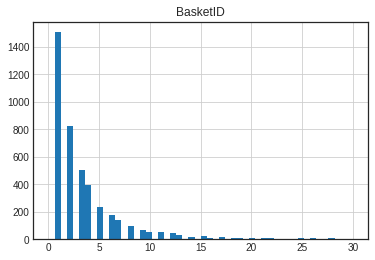

In [71]:
df_n_basket_per_user.hist(bins=50, range=[0,30])

La maggior parte degli utenti ha effettuato in totale tra 1 e 5 carrelli.

In [73]:
df_n_basket_per_user.describe()

,BasketID
count,4331.000000
mean,4.249596
std,7.641705
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,206.000000


In [77]:
df_n_basket_per_user[df_n_basket_per_user['BasketID'] > 8] 

,BasketID
CustomerID,
12362.0,10
12395.0,12
12415.0,20
12417.0,9
12431.0,15
...,...
18225.0,12
18226.0,11
18229.0,20


Per ogni utente posso calcolare il numero medio di prodotti aquistati in un mese.

In [55]:
tmp = df.groupby(['CustomerID', pd.Grouper(key="BasketDate", freq="M")]).aggregate({'Qta':'sum'})
tmp2 = tmp.reset_index(level='BasketDate').groupby('CustomerID').aggregate({'Qta':'sum'})
tmp2['MeanPerMonth'] = tmp2['Qta']/13
tmp2['MeanPerMonth'] = tmp2['MeanPerMonth'].round().astype(int).copy()
tmp2

,Qta,MeanPerMonth
CustomerID,,
12346.0,74215,5709
12347.0,2458,189
12348.0,2332,179
12349.0,630,48
12350.0,196,15
...,...,...
18280.0,45,3
18281.0,54,4
18282.0,103,8


In [56]:
df['BasketDate'].min()

Timestamp('2010-12-01 08:26:00')

In [57]:
df['BasketDate'].max()

Timestamp('2011-12-09 12:50:00')